In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# Set working directory
os.chdir('/home/54b3e09d-d775-4c65-93b7-67c241d43466/5510_Final_Project')

In [4]:
df = pd.read_csv('Job_Postings_US new.csv')

In [9]:
df_new = pd.concat( [df[df.seniority_level == 'Mid-Senior level'], df[df.seniority_level == 'Entry level'], df[df.seniority_level == 'Internship']])
df_new.replace({'seniority_level': {'Entry level': 'Junior level', 'Internship': 'Junior level'}}, inplace= True)

,ID,job_posted_date,company_address_locality,company_address_region,company_name,company_description,job_description_text,seniority_level,job_title
1,1,2025-03-14,San Francisco,California,Ikigai,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
4,4,2025-03-28,Boston,Massachusetts,HMH,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer
21,21,2025-03-25,London,United Kingdom,National Grid,National Grid lies at the heart of a transform...,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level,"Senior Data Scientist, Data Science"
22,22,2025-04-09,London,United Kingdom,National Grid,National Grid lies at the heart of a transform...,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level,"Senior Data Scientist, Data Science"
23,23,2025-03-25,London,United Kingdom,National Grid,National Grid lies at the heart of a transform...,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level,"Senior Data Scientist, Data Science"
...,...,...,...,...,...,...,...,...,...
965,965,2025-04-03,Omaha,Nebraska,Aviture,Unlock the Art of the Possible with Aviture. A...,What is Aviture?Aviture is a full-service tech...,Junior level,Software Engineer Internship
976,976,2025-04-09,Camarillo,CA,Semtech,Semtech Corporation is a high-performance semi...,Location: US RemoteJob SummaryWe are seeking a...,Junior level,Artificial Intelligence / Data Scientist Inter...
980,980,2025-04-04,Los Angeles,California,TikTok,TikTok is the world's leading destination for ...,ResponsibilitiesThe Business Risk Integrated C...,Junior level,Machine Learning Engineer Intern (LLM Risk Sur...
981,981,2025-04-09,Camarillo,CA,Semtech,Semtech Corporation is a high-performance semi...,Location: US RemoteJob SummaryWe are seeking a...,Junior level,Artificial Intelligence / Data Scientist Inter...


In [10]:
arrays = [
        np.array(["Iteration 1", "Iteration 1","Iteration 1", "Iteration 1",   
                  "Iteration 2","Iteration 2","Iteration 2","Iteration 2",                 
                  "Iteration 3","Iteration 3","Iteration 3","Iteration 3" ]),
        np.array(["accuracy logit", "accuracy SVM", "AUC logit", "AUC SVM", 
                  "accuracy logit", "accuracy SVM", "AUC logit", "AUC SVM",
                 "accuracy logit", "accuracy SVM", "AUC logit", "AUC SVM"
                 ])
]

results = pd.Series([0.5021, 0.5021, 0.4809, 0.5148,
               0.5228, 0.5519, 0.5661, 0.5886,
               0.5477, 0.5892, 0.58, 0.6148
              ], index=arrays)

results_df = pd.DataFrame(results, columns = ['Score'])
results_df

Score
Iteration 1 accuracy logit  0.5021
            accuracy SVM    0.4809
            AUC logit       0.5021
            AUC SVM         0.5148
Iteration 2 accuracy logit  0.5228
            accuracy SVM    0.5661
            AUC logit       0.5519
            AUC SVM         0.5886
Iteration 3 accuracy logit  0.5477
            accuracy SVM    0.5800
            AUC logit       0.5892
            AUC SVM         0.6152

In [13]:
%%markdown
# Conclusion and discussion
To predict whether a vacancy was for a junior level function or mid-senior level function I did three iterations of the same model: 
Singular Value Decomposition followed by a logistic regression and a support vector machine. The results (shown below) were not good: 
Not once did the accuracy reach 0.6 and the AUC hit this point for only one version of the model. However, I'm encouraged by the fact 
that every iteration after the first showed gradual improvements.

The improvements implemented in iteration 2:
- I removed all unigrams and bigrams that appeared often and in both types of frequencies.  
- In the vectorization step, I removed the maximum of vacancies unigrams and bigrams could appear in.

Subsequently, in iteration 3:
- I increased the number of components in the SVD from 70 to 160. 

Even after these steps I still think there is room to improve on the predictive performance of the model.

##### SVD
An obvious step is again to increase the components of the Singular Value Decomposition. 
In iteration 3, the SVD with 160 components accounted for 67% of the variance. A next step 
would be to train a model wih an accounted variance of 75% or even 80%.

##### N-grams
Another initiative to improve the model is to increase the 'n' in n-grams. 
I only trained models including unigrams and bigrams. Training models with 3-grams, 4-grams or 
an even bigger n would maybe yield better results. 
Of course, there is a theoretical risk of overfitting. As n increases, terms become more rare. 
However, this risk would mitigated by increasing the number of vacancies the n-grams have to appear in.

##### Resampling
In my opinion, another opportunity for improvement lies in sampling of the dataset. The company TikTok had by far the most vacancies in the uncleaned dataset.
Looking at the separate graphs for the junior and mid-senior level vacancies it is obvious that the majority of TikTok vacancies are at the junior level. 
This means if TikTok samples are unevenly divided among the training and test sets:
- Either the model will be trained on partly on TikTok observations while it won't predict a lot of TikTok vacancies.
- Or there won't be TikTok observations in the training set making it likely the TikTik vacancies will be predicted wrong because the model 
is not trained on specific word combinations of TikTok vacancies.

Thus, a solution would be to resample the dataset. For example, if no company would have more than 15 vacancies 
in this dataset TikTok would not be overrepresented and it is more likely that the training and test set are balanced 
in terms what companies at what frequency rate are in the respective datasets.  

To a lesser degree this sampling problem also occurs with the region of the vacancies: Most of the vacancies are in California, 
but significantly more California vacancies (20%) are junior level vacancies.



# Conclusion and discussion
To predict whether a vacancy was for a junior level function or mid-senior level function I did three iterations of the same model: 
Singular Value Decomposition followed by a logistic regression and a support vector machine. The results (shown below) were not good: 
Not once did the accuracy reach 0.6 and the AUC hit this point for only one version of the model. However, I'm encouraged by the fact 
that every iteration after the first showed gradual improvements.

The improvements implemented in iteration 2:
- I removed all unigrams and bigrams that appeared often and in both types of frequencies.  
- In the vectorization step, I removed the maximum of vacancies unigrams and bigrams could appear in.

Subsequently, in iteration 3:
- I increased the number of components in the SVD from 70 to 160. 

Even after these steps I still think there is room to improve on the predictive performance of the model.

##### SVD
An obvious step is again to increase the components of the Singular Value Decomposition. 
In iteration 3, the SVD with 160 components accounted for 67% of the variance. A next step 
would be to train a model wih an accounted variance of 75% or even 80%.

##### N-grams
Another initiative to improve the model is to increase the 'n' in n-grams. 
I only trained models including unigrams and bigrams. Training models with 3-grams, 4-grams or 
an even bigger n would maybe yield better results. 
Of course, there is a theoretical risk of overfitting. As n increases, terms become more rare. 
However, this risk would mitigated by increasing the number of vacancies the n-grams have to appear in.

##### Resampling
In my opinion, another opportunity for improvement lies in sampling of the dataset. The company TikTok had by far the most vacancies in the uncleaned dataset.
Looking at the separate graphs for the junior and mid-senior level vacancies it is obvious that the majority of TikTok vacancies are at the junior level. 
This means if TikTok samples are unevenly divided among the training and test sets:
- Either the model will be trained on partly on TikTok observations while it won't predict a lot of TikTok vacancies.
- Or there won't be TikTok observations in the training set making it likely the TikTik vacancies will be predicted wrong because the model 
is not trained on specific word combinations of TikTok vacancies.

Thus, a solution would be to resample the dataset. For example, if no company would have more than 15 vacancies 
in this dataset TikTok would not be overrepresented and it is more likely that the training and test set are balanced 
in terms what companies at what frequency rate are in the respective datasets.  

To a lesser degree this sampling problem also occurs with the region of the vacancies: Most of the vacancies are in California, 
but significantly more California vacancies (20%) are junior level vacancies.



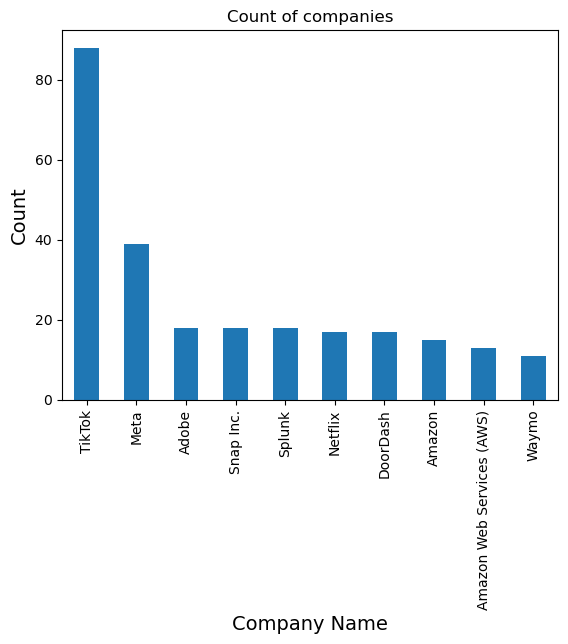

In [7]:
# The ten companies with the highest amount of vacancies.
df.groupby('company_name')['company_name'].count().sort_values(ascending= False).head(10).plot(kind= 'bar')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Company Name', fontsize = 14)
plt.xticks()
plt.title('Count of companies')
plt.show()

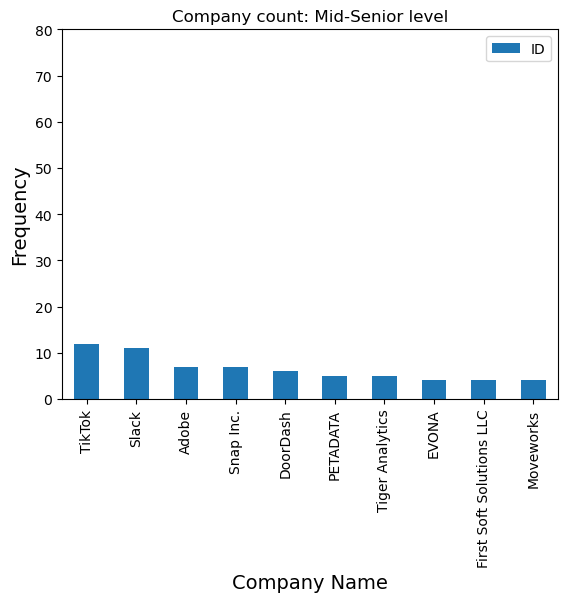

In [10]:
group_df_new = df_new.groupby(['seniority_level','company_name'])[['ID']].count().sort_values(ascending = False, by = ['seniority_level' ,'ID'])
group_df_new.loc['Mid-Senior level'].head(10).plot(kind= 'bar')
plt.title('Company count: Mid-Senior level')
plt.xlabel('Company Name', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.ylim(0, 80)
plt.show()

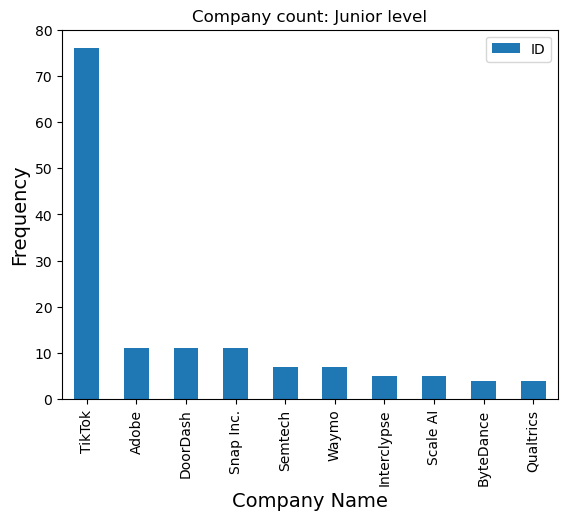

In [11]:
group_df_new.loc['Junior level'].head(10).plot(kind= 'bar')
plt.title('Company count: Junior level')
plt.xlabel('Company Name', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.ylim(0, 80)
plt.show()